In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# data preparation
# first randomize the training data. 
# then split the training data and labels in X_train and y_train respectively
# try processing on the data - normalize and reshape them


In [4]:
train = train.sample(frac=1)
train.head(n=4)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38732,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3686,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30090,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31205,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = train['label']

In [6]:
del train['label']
X_train = train

In [7]:
X_train.head(n=4)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train /= 255
test /= 255

In [9]:
X_train = X_train.values.reshape(-1,28,28,1).astype('float32')
test = test.values.reshape(-1,28,28,1).astype('float32')

In [10]:
X_train.dtype

dtype('float32')

In [11]:
y_train = to_categorical(y_train,num_classes=10)

In [12]:
y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [13]:
y_train = y_train.astype('int32')

In [14]:
random_seed = 2

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.1,random_state = random_seed)

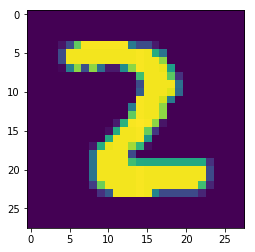

In [16]:
g = plt.imshow(X_train[33599][:,:,0])

In [17]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [19]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [20]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [22]:
epochs = 10
batch_size = 100


In [26]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 16s - loss: 0.0264 - acc: 0.9926 - val_loss: 0.0316 - val_acc: 0.9921
Epoch 2/10
 - 16s - loss: 0.0240 - acc: 0.9937 - val_loss: 0.0419 - val_acc: 0.9898
Epoch 3/10
 - 16s - loss: 0.0257 - acc: 0.9926 - val_loss: 0.0373 - val_acc: 0.9931
Epoch 4/10
 - 16s - loss: 0.0234 - acc: 0.9934 - val_loss: 0.0384 - val_acc: 0.9914
Epoch 5/10
 - 16s - loss: 0.0257 - acc: 0.9931 - val_loss: 0.0316 - val_acc: 0.9919
Epoch 6/10
 - 16s - loss: 0.0220 - acc: 0.9936 - val_loss: 0.0306 - val_acc: 0.9943
Epoch 7/10
 - 16s - loss: 0.0239 - acc: 0.9933 - val_loss: 0.0464 - val_acc: 0.9914
Epoch 8/10
 - 16s - loss: 0.0222 - acc: 0.9934 - val_loss: 0.0364 - val_acc: 0.9921
Epoch 9/10
 - 16s - loss: 0.0244 - acc: 0.9931 - val_loss: 0.0364 - val_acc: 0.9929
Epoch 10/10
 - 16s - loss: 0.0234 - acc: 0.9936 - val_loss: 0.0433 - val_acc: 0.9910


In [27]:
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [28]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [29]:
data = pd.read_csv('cnn_mnist_datagen.csv')

In [30]:
data.head(n=5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
